In [3]:
%matplotlib inline

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn.preprocessing as sp
from scipy import stats

In [5]:
Dataset_raw = pd.read_csv('Final_Data.csv')

In [6]:
Dataset_df = Dataset_raw[['Tin','FR','T1','T2','Qcool','RR','B','QR','Qc','FV','FL_Top','FL_Bot','T5','T10','T15','T20','T25','XME_V','XME_D','XW_B']]

In [7]:
Dataset_df

,Tin,FR,T1,T2,Qcool,RR,B,QR,Qc,FV,FL_Top,FL_Bot,T5,T10,T15,T20,T25,XME_V,XME_D,XW_B
0,230.3,5.01,46.9,47.3,-3408.57514,1.37,99.750,1983.48465,-2488.67285,1.138522,98.280150,64.914011,66.257027,69.541474,75.486573,76.672814,87.675879,0.494652,0.995920,0.993144
1,230.1,4.99,47.1,47.1,-3361.39142,1.35,99.780,1915.60558,-2468.84306,1.115023,98.296869,64.923862,66.300389,69.675587,75.673650,76.848653,87.632430,0.490251,0.995804,0.992883
2,230.2,4.96,47.0,47.3,-3381.69240,1.32,99.750,1904.54513,-2435.46282,1.142253,98.255017,64.936598,66.353072,69.789407,75.703274,76.876799,87.627191,0.494556,0.995726,0.992843
3,230.1,4.96,46.9,47.2,-3386.32257,1.34,99.750,1931.66436,-2457.12858,1.138654,98.259095,64.926414,66.312165,69.688798,75.625758,76.797898,87.520617,0.492412,0.995789,0.992799
4,230.1,4.96,47.0,47.0,-3373.49223,1.32,99.750,1897.66426,-2437.68179,1.116335,98.291160,64.936477,66.353103,69.794478,75.723243,76.896943,87.658595,0.488026,0.995669,0.992860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15932,238.7,4.66,57.0,43.5,-2778.68173,2.57,101.975,2466.88934,-3715.32348,0.543364,96.821734,64.859134,65.779825,67.830652,74.295629,75.245604,80.543126,0.417377,0.996010,0.973971
15933,238.4,4.69,57.3,43.8,-2733.54212,2.59,101.950,2443.71320,-3737.10741,0.545191,96.911121,64.859891,65.779871,67.832493,74.344810,75.296630,80.659625,0.423115,0.996075,0.974561
15934,238.7,4.66,57.4,44.2,-2741.43180,2.60,101.930,2457.44303,-3746.68840,0.564553,96.964680,64.859930,65.779101,67.825150,74.321131,75.275515,80.697085,0.430865,0.996145,0.974983
15935,239.1,4.65,57.9,44.2,-2719.76161,2.56,101.955,2386.51443,-3701.16486,0.549742,96.874197,64.860486,65.784184,67.867261,74.457235,75.406400,80.734354,0.430865,0.996151,0.974436


In [8]:
#Dataset_df.info()

In [9]:
#Dataset_df.isnull().sum()

In [10]:
#Dataset_df.corr()

In [11]:
'''
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(Dataset_df.corr().round(2), annot=True, linewidths=0.2, square=True)
'''

"\nsns.set(rc = {'figure.figsize':(25,15)})\nsns.heatmap(Dataset_df.corr().round(2), annot=True, linewidths=0.2, square=True)\n"

In [12]:
Dataset_raw = np.array(Dataset_df)
Dataset = np.random.permutation(Dataset_raw)

X_train = Dataset[:12000,:9]
Y_train = Dataset[:12000,-3:]
X_test  = Dataset[12000:,:9]
Y_test  = Dataset[12000:,-3:]

scaler_X_train = sp.StandardScaler().fit(X_train)
X_train_scl = scaler_X_train.transform(X_train)
scaler_X_test = sp.StandardScaler().fit(X_test)
X_test_scl = scaler_X_test.transform(X_test)
scaler_Y_train = sp.StandardScaler().fit(Y_train)
Y_train_scl = scaler_Y_train.transform(Y_train)
scaler_Y_test = sp.StandardScaler().fit(Y_test)
Y_test_scl = scaler_Y_test.transform(Y_test)

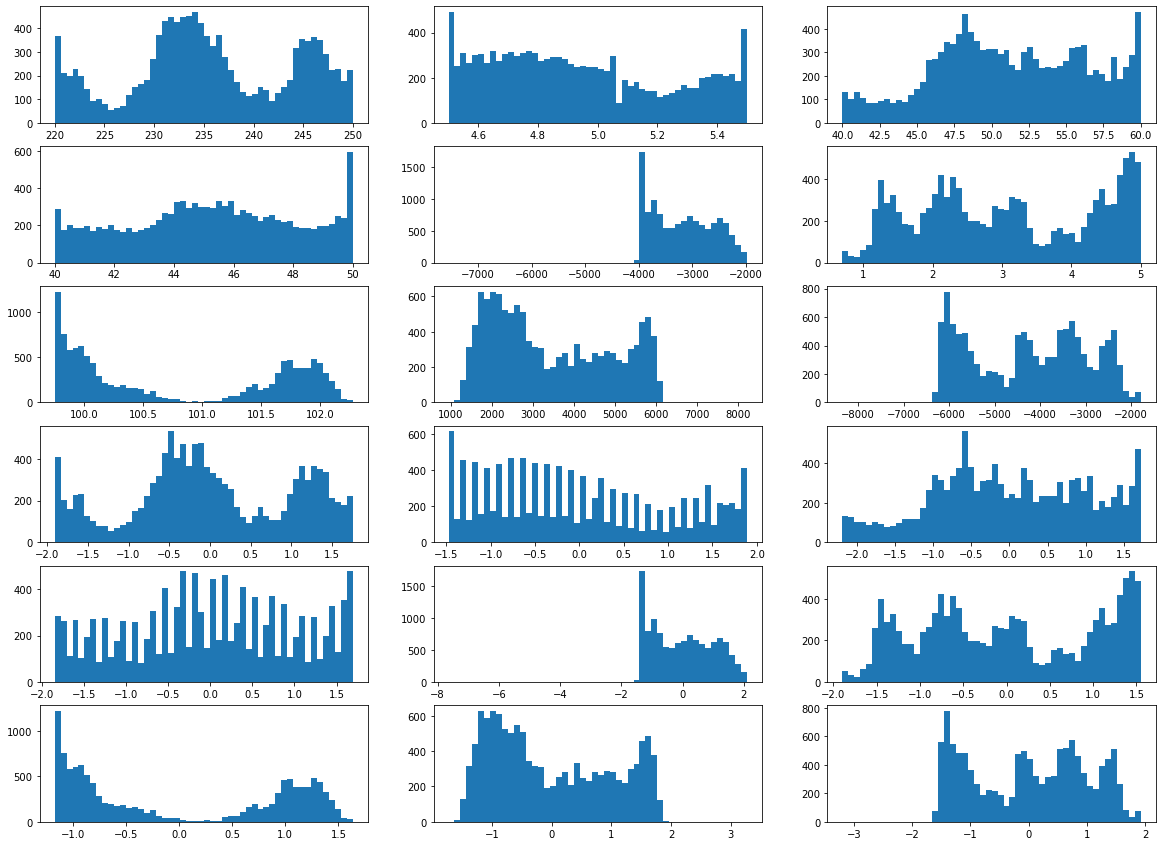

In [11]:
fig, ax = plt.subplots(6,3,figsize=(20,15))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.hist(X_train[:,i] , bins = 50)
    plt.subplot(6,3,i+10)
    plt.hist(X_train_scl[:,i] , bins = 50)

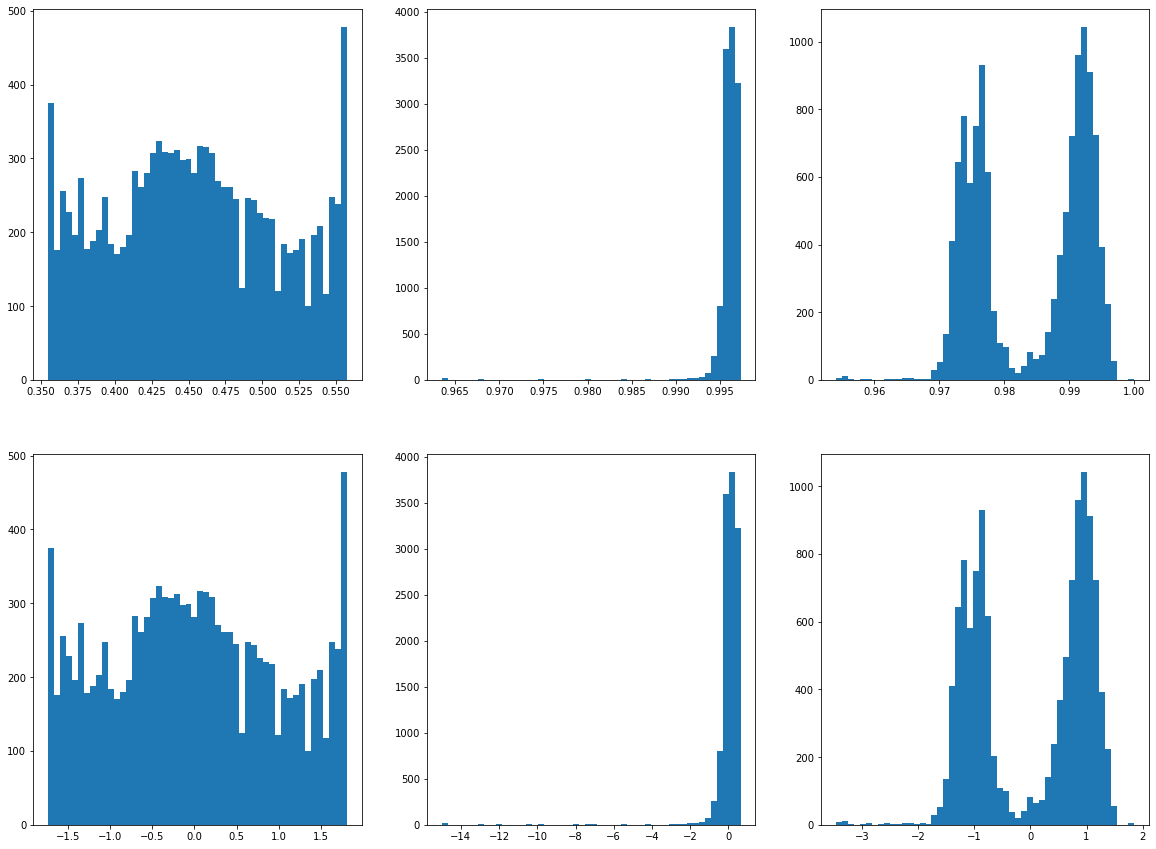

In [12]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(Y_train[:,i] , bins = 50)
    plt.subplot(2,3,i+4)
    plt.hist(Y_train_scl[:,i] , bins = 50)

In [13]:
'''
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 16  , activation = 'relu' , input_dim = 9) ,
        tf.keras.layers.Dense(units = 64  , activation = 'relu'),
        tf.keras.layers.Dense(units = 128 , activation = 'relu'),
        tf.keras.layers.Dense(units = 256 , activation = 'relu'),
        tf.keras.layers.Dense(units = 128 , activation = 'relu'),
        tf.keras.layers.Dense(units = 64  , activation = 'relu'),
        tf.keras.layers.Dense(units = 16  , activation = 'relu'),
        tf.keras.layers.Dense(units = 3                        )
        ])
'''
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 16  , activation = 'relu' , input_dim = 9) ,
        tf.keras.layers.Dense(units = 64  , activation = 'relu'),
        tf.keras.layers.Dense(units = 128 , activation = 'relu'),
        tf.keras.layers.Dense(units = 64  , activation = 'relu'),
        tf.keras.layers.Dense(units = 16  , activation = 'relu'),
        tf.keras.layers.Dense(units = 3                        )
        ])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = 'mse',
              metrics = ['accuracy','mse'])
model.summary()
history = model.fit(X_train_scl , Y_train_scl , epochs = 500 , batch_size = 1000 , validation_split = 0.2 , verbose = 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 18,915
Trainable params: 18,915
Non-trainable params: 0
____________________________________________________

In [14]:
score = model.evaluate(X_test_scl , Y_test_scl , batch_size = 100 , verbose = 0)
print('score:',score)
print('Accuracy:',score[1]*100,'%')

score: [0.02958000090424088, 0.99237996, 0.029579999]
Accuracy: 99.23799633979797 %


In [15]:
Y_predict_scl = model.predict(X_test_scl)
Y_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_

In [16]:
print(history.params)

{'batch_size': 1000, 'epochs': 500, 'steps': 10, 'samples': 9600, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse']}


(0.0, 1.0)

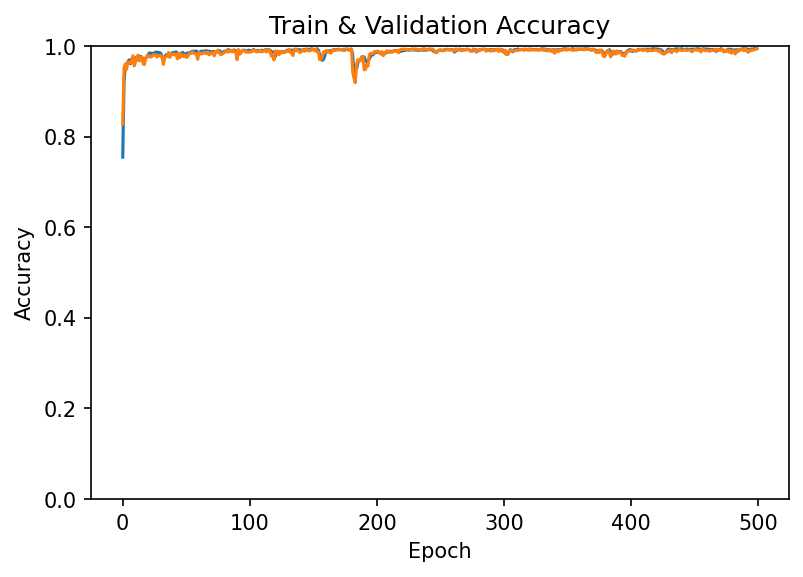

In [17]:
plt.figure(dpi = 150)
plt.title('Train & Validation Accuracy')
plt.plot(history.history['accuracy'],label = 'Train_Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
#plt.savefig('Accuracy.png', dpi = 150)

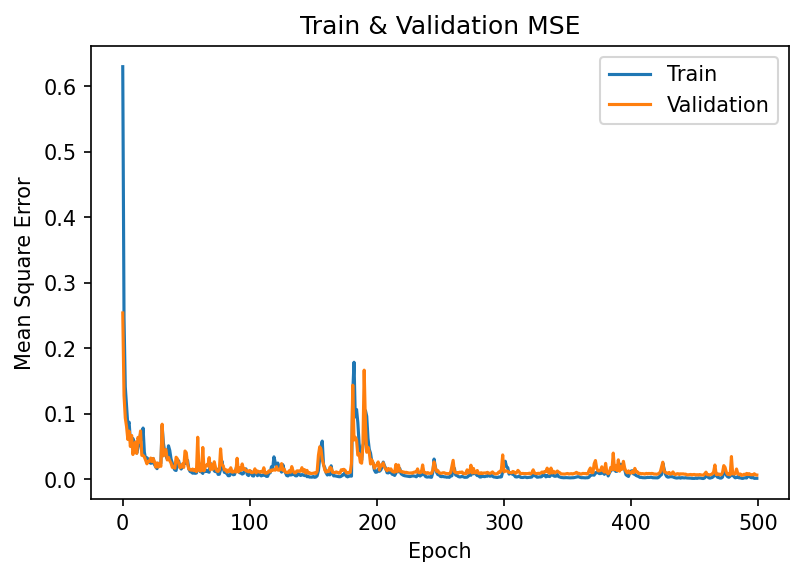

In [18]:
plt.figure(dpi = 150)
plt.title('Train & Validation MSE')
plt.plot(history.history['mse'],label = 'Train')
plt.plot(history.history['val_mse'],label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
#plt.savefig('MSE', dpi = 150)

R_Pearson =  0.999757967796816


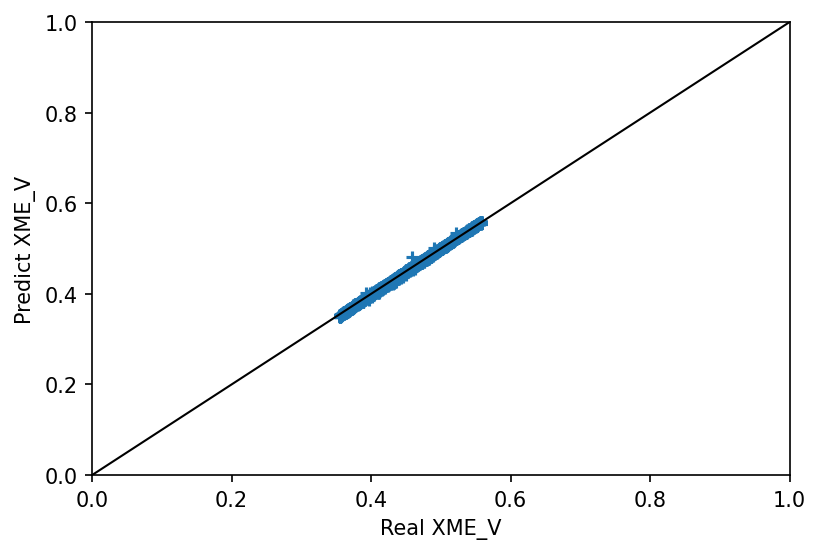

In [19]:
Y_test_reshape = np.reshape(Y_test[:,0],(3937,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(3937,))

plt.figure(dpi = 150)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.scatter(Y_test[:,0],Y_predict[:,0],marker = '+')
plt.plot([0,1],[0,1],'black',linewidth = 1)
plt.xlabel('Real XME_V')
plt.ylabel('Predict XME_V')
plt.savefig('XME_V.png', dpi = 150)

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

R_Pearson =  0.999757967796816


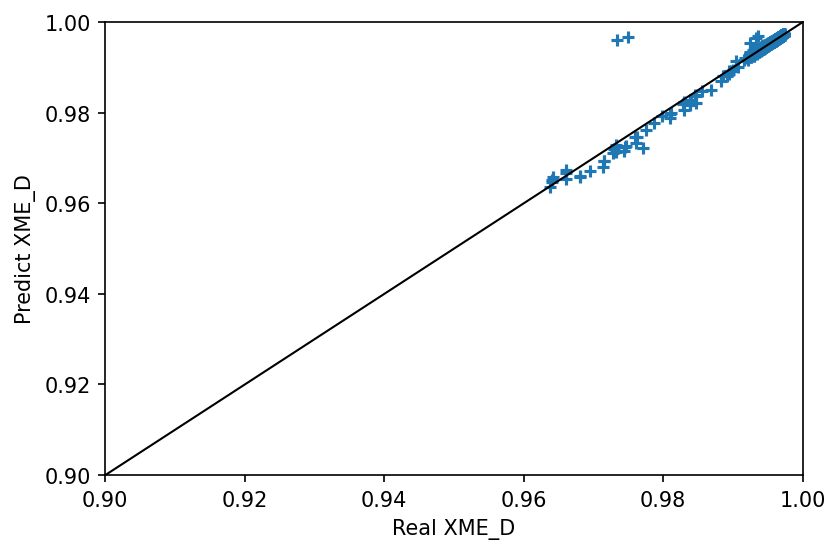

In [20]:
Y_test_reshape = np.reshape(Y_test[:,0],(3937,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(3937,))

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

plt.figure(dpi = 150)
plt.xlim(0.9,1)
plt.ylim(0.9,1)
plt.scatter(Y_test[:,1],Y_predict[:,1],marker = '+')
plt.plot([0.9,1],[0.9,1],'black',linewidth = 1)
plt.xlabel('Real XME_D')
plt.ylabel('Predict XME_D')
plt.savefig('XME_D.png', dpi = 150)

R_Pearson =  0.999757967796816


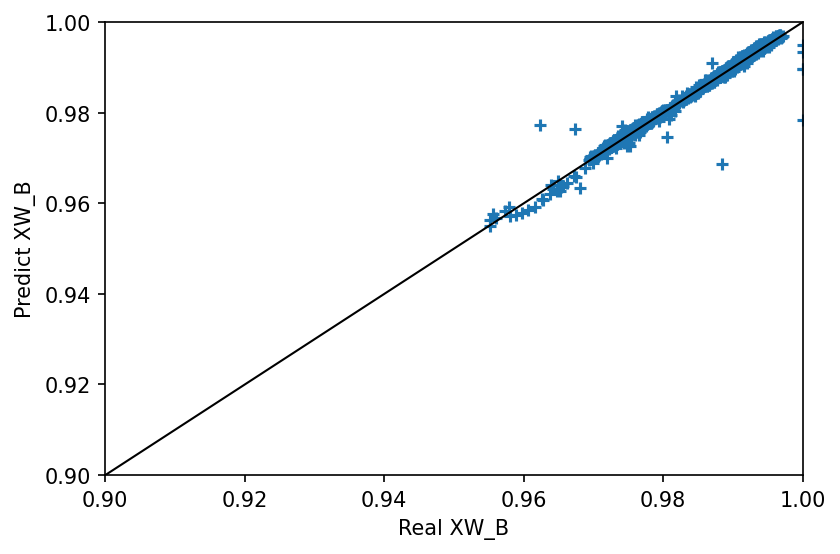

In [21]:
Y_test_reshape = np.reshape(Y_test[:,0],(3937,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(3937,))

plt.figure(dpi = 150)
plt.xlim(0.9,1)
plt.ylim(0.9,1)
plt.scatter(Y_test[:,2],Y_predict[:,2],marker = '+')
plt.plot([0.9,1],[0.9,1],'black',linewidth = 1)
plt.xlabel('Real XW_B')
plt.ylabel('Predict XW_B')
plt.savefig('XW_B.png', dpi = 150)

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

In [16]:

scaler_X_train = sp.StandardScaler().fit(X_train)
X_train_scl = scaler_X_train.transform(X_train)
scaler_X_test = sp.StandardScaler().fit(X_test)
X_test_scl = scaler_X_test.transform(X_test)
scaler_Y_train = sp.StandardScaler().fit(Y_train)
Y_train_scl = scaler_Y_train.transform(Y_train)
scaler_Y_test = sp.StandardScaler().fit(Y_test)
Y_test_scl = scaler_Y_test.transform(Y_test)

X_real = np.array([230,5,50,45,-3300,1.32,99.75,1920,-2450])
X_train = np.vstack([X_train,X_real])

scaler_X_train = sp.StandardScaler().fit(X_train)
X_train_scl = scaler_X_train.transform(X_train)

Y_predict_scl = model.predict(X_test_scl)
Y_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_

(12001, 9)
[ 2.300e+02  5.000e+00  5.000e+01  4.500e+01 -3.300e+03  1.320e+00
  9.975e+01  1.920e+03 -2.450e+03]
(12002, 9)


NameError: name 'model' is not defined